C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


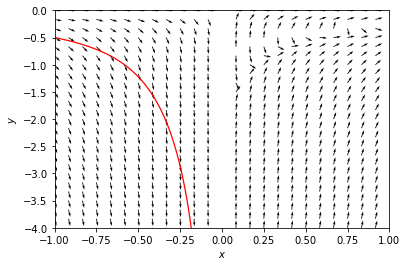

In [2]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= -(2*(x[1]**2)*x[0] + x[1]*np.exp(x[1])) / (x[0]*(1+x[1])*np.exp(x[1]) + 2*x[1]*(x[0]**2))   ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[-1,-0.5]]
color=['r']


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-1,1,25),np.linspace(-4,0,25) )

V = -(2*Y**2*X + Y*np.exp(Y)) / (X*(1+Y)*np.exp(Y) + 2*Y*X**2)## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)


##Limits of the graph
plt.xlim([-1,1])
plt.ylim([-4,0])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [4]:
## k levels?7
levels_solution = []
x,y=-1,-0.5
K1=(x**2 * y**2) + x*y*np.exp(y) 
print('k1 value is',K1) 
levels_solution.append(K1)


k1 value is 0.5532653298563167


In [5]:
## Levels we are interested to compare solution from gradient field
print(levels_solution)
levels=sorted(levels_solution)
print(levels) ## Ordenado para plotear las contour curves

[0.5532653298563167]
[0.5532653298563167]


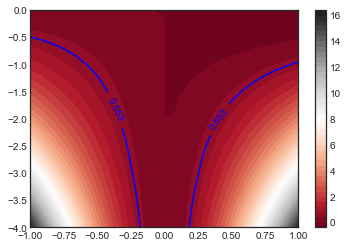

In [10]:
%matplotlib inline
plt.style.use('seaborn-white')

xs = np.linspace(-1, 1, 25)
ys = np.linspace(-4, 0, 25)

def fs(xs, ys):  ## y_exact equation without constant
    
    return (xs**2) * (ys**2) + (xs*ys*np.exp(ys)) 

X, Y = np.meshgrid(xs, ys)
Z = fs(X,Y)

contours = plt.contour(X, Y, Z, levels, colors='blue') ## Our solution
plt.clabel(contours, inline=1, fontsize=10)

plt.contourf(X, Y, Z, 50, cmap='RdGy') ## General contour curve
plt.colorbar()